##### Importation des librairies

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("../Dataframe/new_usa_accidents_light.csv")

#df = pd.read_csv("new_usa_accidents.csv")

Affichage des noms de toutes les colonnes du dataframe df

In [28]:
print(df.columns)

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Side', 'City', 'County', 'State',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Station',
       'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Clear', 'Cloud', 'Rain',
       'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Year', 'Month', 'Weekday',
       'Day', 'Hour', 'Minute', 'Precipitation_NA'],
      dtype='object')


Extrait des 5 permieres ligne du dataset:

In [29]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Side,City,County,...,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,R,Dublin,Franklin,...,False,False,False,2016,2,2,8,0,37.0,0
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,At OH-4/OH-235/Exit 41 - Accident.,R,Dayton,Montgomery,...,False,False,False,2016,2,2,8,5,356.0,0
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,At I-71/US-50/Exit 1 - Accident.,R,Cincinnati,Hamilton,...,False,False,False,2016,2,2,8,6,375.0,0
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,At Dart Ave/Exit 21 - Accident.,R,Akron,Summit,...,False,False,False,2016,2,2,8,6,411.0,1
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,At Mitchell Ave/Exit 6 - Accident.,R,Cincinnati,Hamilton,...,False,False,False,2016,2,2,8,7,473.0,0


## Analyse descriptive

### 1. Etude des tendances temporelles des accidents
Ici nous étudions les caractéristiques des accidents en fonction de l’heure, du jour, et du mois.
Dans un premier temps, nous chercherons à déterminer s'il existe une corrélation entre le paramètre météorologique et la fréquence des accidents.

Création d'un graphique en barres qui représente le nombre d'accidents par heure de la journée:

C:\Users\jomic\AppData\Local\Temp\ipykernel_27656\4060696805.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Purples')(by_hour.values / by_hour.values.max())


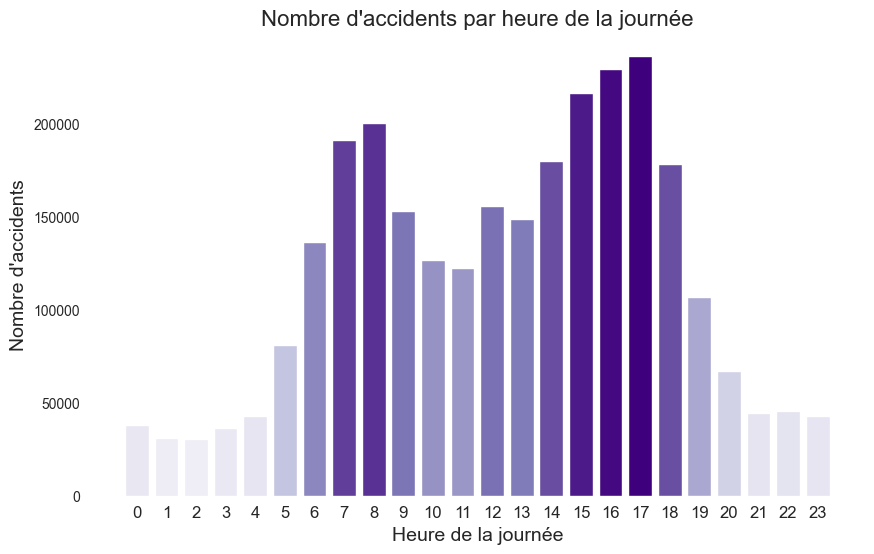

In [30]:
by_hour = df.groupby("Hour").size()

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.get_cmap('Purples')(by_hour.values / by_hour.values.max())
ax.bar(by_hour.index, by_hour.values, color=colors)

ax.set_title("Nombre d'accidents par heure de la journée", fontsize=16)
ax.set_xlabel("Heure de la journée", fontsize=14)
ax.set_ylabel("Nombre d'accidents", fontsize=14)

ax.xaxis.set_ticks(np.arange(min(by_hour.index), max(by_hour.index)+1, 1.0))
ax.tick_params(axis='x', rotation=0, labelsize=12)
plt.box(False)

plt.show()

Création d'un graphique en barres qui montre le nombre d'accidents par jour de la semaine:

C:\Users\jomic\AppData\Local\Temp\ipykernel_27656\1100781296.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Purples')(by_weekday.values / by_weekday.values.max())


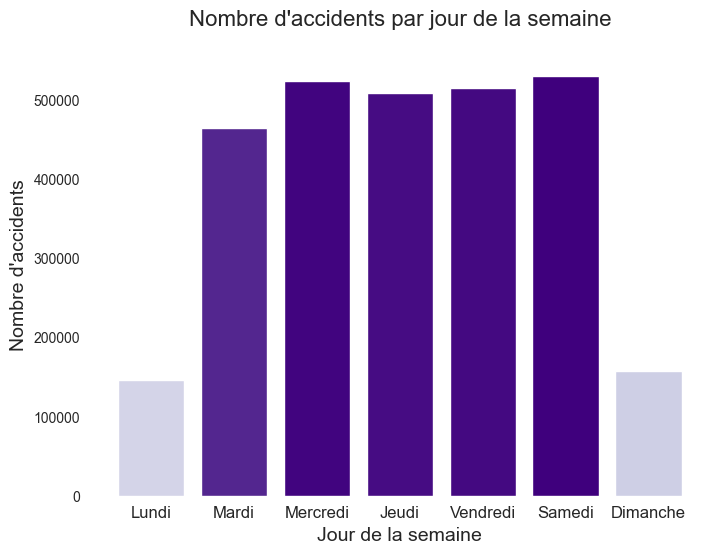

In [31]:
by_weekday = df.groupby('Weekday').size()

fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.get_cmap('Purples')(by_weekday.values / by_weekday.values.max())
ax.bar(by_weekday.index, by_weekday.values, color=colors)

ax.set_title("Nombre d'accidents par jour de la semaine", fontsize=16)
ax.set_xlabel("Jour de la semaine", fontsize=14)
ax.set_ylabel("Nombre d'accidents", fontsize=14)

ax.set_ylim(0, by_weekday.max()*1.1)
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.set_xticks(by_weekday.index)
ax.set_xticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.box(False)

plt.show()

Calcul du nombre d'accidents par mois et création d'un graphique en barres avec des couleurs de barres variables pour chaque mois:

C:\Users\jomic\AppData\Local\Temp\ipykernel_27656\2741641075.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Purples')(accidents_per_month.values / accidents_per_month.values.max())


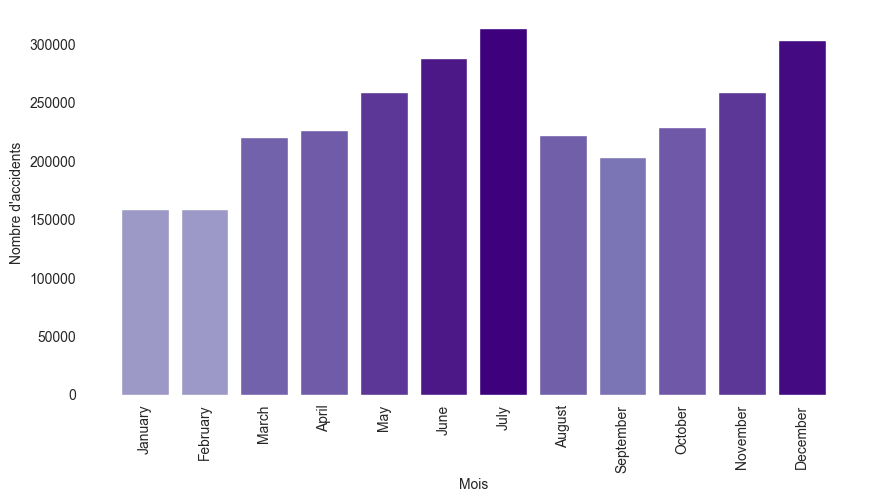

In [32]:
import calendar

accidents_per_month = df.groupby('Month')['ID'].count()

months_names = [calendar.month_name[i] for i in accidents_per_month.index]

colors = plt.cm.get_cmap('Purples')(accidents_per_month.values / accidents_per_month.values.max())

plt.figure(figsize=(10, 5))
plt.bar(months_names, accidents_per_month.values, color=colors)
ax.set_title("Nombre d'accidents par mois", fontsize=16)
plt.xlabel('Mois')
plt.ylabel('Nombre d\'accidents')
plt.xticks(rotation=90)
plt.box(False)

plt.show()

Calcul de la gravité moyenne des accidents par heure et affichage d'un graphique avec la variation de la gravité en fonction de l'heure:

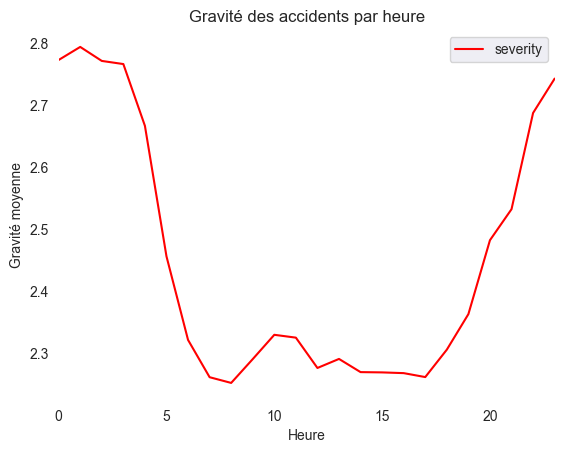

In [33]:
severity_h = df.groupby('Hour')['Severity'].mean()

fig, ax = plt.subplots()

ax.plot(severity_h, color='red', label='severity')
ax.set_xlabel('Heure')
ax.set_ylabel('Gravité moyenne')
ax.legend(loc='upper right')

ax.set_title('Gravité des accidents par heure')
plt.style.use('bmh')
plt.xlim((0, 23))
plt.box(False)
plt.show()

##### Intepretation du resultat:
En établissant une comparaison de ce graphe avec le graphique illustrant le nombre d'accidents par heure de la journée, il est observé que la période allant de 0h à 5h et de 19h à 23h enregistre une baisse significative du nombre moyen d'accidents. Toutefois, pendant cette même période, la gravité des accidents demeure élevée. Il est ainsi possible de déduire qu'une forte corrélation négative existe entre le nombre d'accidents et leur gravité.

### 2. Etude de la  corrélation entre les conditions météorologiques, le nombre d’accidents et leur gravité

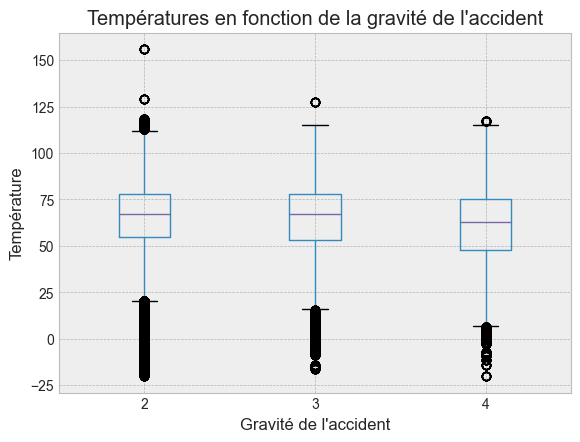

In [34]:
df.boxplot(column=["Temperature(F)"], by="Severity")
plt.xlabel("Gravité de l'accident")
plt.ylabel("Température")
plt.title("Températures en fonction de la gravité de l'accident")
plt.suptitle("")
plt.show()

##### Interprétation:
* La température n'a aucune influence sur la survenue d'un accident et donc sur la gravité par rapport aux températures
* Les gravités 2 et 3 sont quasi similaires. Les accidents de gravités 4 ont en moyennes des températures légèrement moins basses que les autres classes (gravité 2 et 3)

In [35]:
df_meteo = df.loc[:, ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset','Clear', 'Cloud', 'Rain',
       'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog','Severity']]

df_meteo.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Severity
0,42.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,Night,False,False,True,False,False,False,False,3
1,36.9,91.0,29.68,10.0,CALM,NaN,0.02,Light Rain,Night,False,False,True,False,False,False,False,2
2,36.0,97.0,29.70,10.0,CALM,NaN,0.02,Overcast,Night,False,True,False,False,False,False,False,2
3,39.0,55.0,29.65,10.0,CALM,NaN,0.00,Overcast,Night,False,True,False,False,False,False,False,2
4,37.0,93.0,29.69,10.0,W,10.4,0.01,Light Rain,Day,False,False,True,False,False,False,False,3


<Axes: title={'center': " Humidité en fonction du nombre d'accidents "}, xlabel="No. d'accident", ylabel='Humidity(%) '>

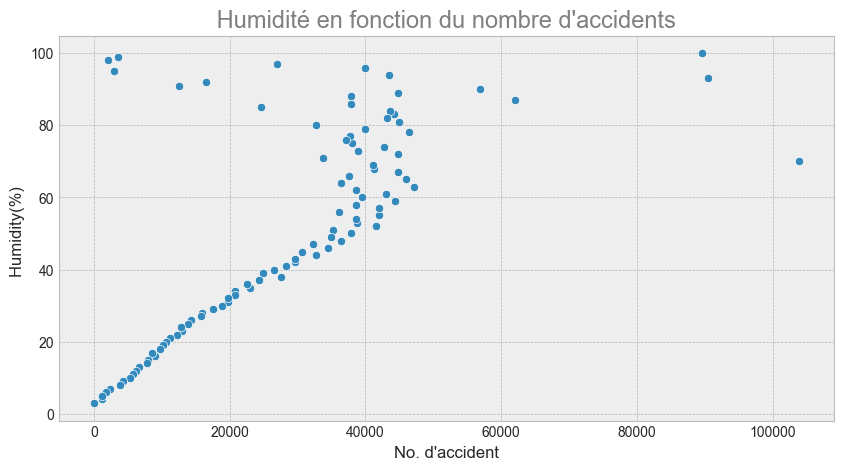

In [36]:
# sns.histplot(df["Humidity(%)"], bins = 20)
# plt.show()

# Tracer le graphique de l'humidité en fonction du nombre d'accidents
plt.figure(figsize=(10,5))
plt.title(" Humidité en fonction du nombre d'accidents ",size=17,color="grey")
plt.xlabel("No. d'accident")
plt.ylabel('Humidity(%) ')
humidity_effect = df['Humidity(%)'].value_counts()
sns.scatterplot(y=humidity_effect.index, x=humidity_effect)


##### Interpretation du graphique :
* Plus l'humidité augmente plus le nombre d'accidents augmente aussi


In [37]:
# Calculer la corrélation entre la gravité des accidents et l'humidité
corr = df['Severity'].corr(df['Humidity(%)'])

# Afficher la corrélation
print("Corrélation entre la gravité des accidents et l'humidité :", corr)


Corrélation entre la gravité des accidents et l'humidité : 0.057046992151849385


##### Interpretation :
Ce code calcule la correlation entre la "gravité des accidents" et "l'humidité"

*** L'humidité n'a aucune influence sur la gravité d'un accident ***

###### Ps: Le résultat affiché est un nombre compris entre -1 et 1 qui indique la force et la direction de la corrélation. Un nombre proche de -1 indique une corrélation négative forte (c'est-à-dire que les accidents sont moins graves lorsque l'humidité est élevée), un nombre proche de 0 indique une corrélation faible ou inexistante, et un nombre proche de 1 indique une corrélation positive forte (c'est-à-dire que les accidents sont plus graves lorsque l'humidité est élevée).

<Axes: title={'center': ' Correlation entre les accidents et la pression  '}, xlabel='No. of accidents', ylabel='Pressure(in)'>

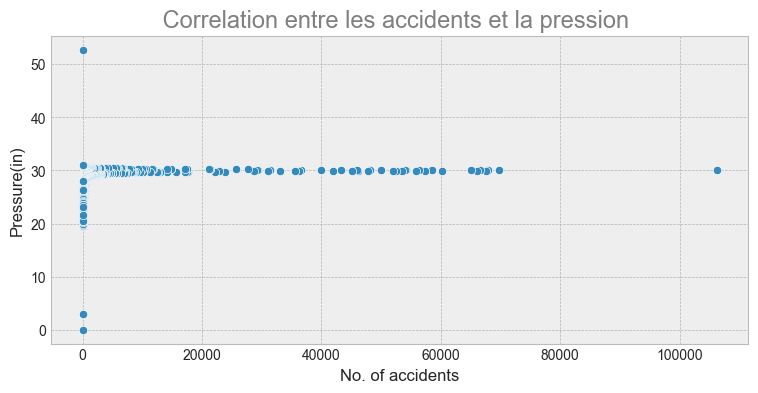

In [38]:
pressure_effect=df["Pressure(in)"].value_counts()
pressure_effect.sort_values().tail()

plt.figure(figsize=(9,4))
plt.title(" Correlation entre les accidents et la pression  ",size=17,color="grey")
plt.xlabel('No. of accidents')
plt.ylabel('Pressure(in)')
sns.scatterplot(y=pressure_effect.index, x=pressure_effect)


##### Interpretation du graphique :
On se rend compte que la majeure partie des accidents survient lorsque la pression est entre 20 et 30. Et plus précisément lorsqu'elle est proche de 30 (valeur moyenne)

*** La pression n'a aucune influence sur la survenue d'un accident ***

###### Ps: La pression de l'air est en moyenne de 29.92 d'apres l'Agence américaine d'observation océanique et atmosphérique


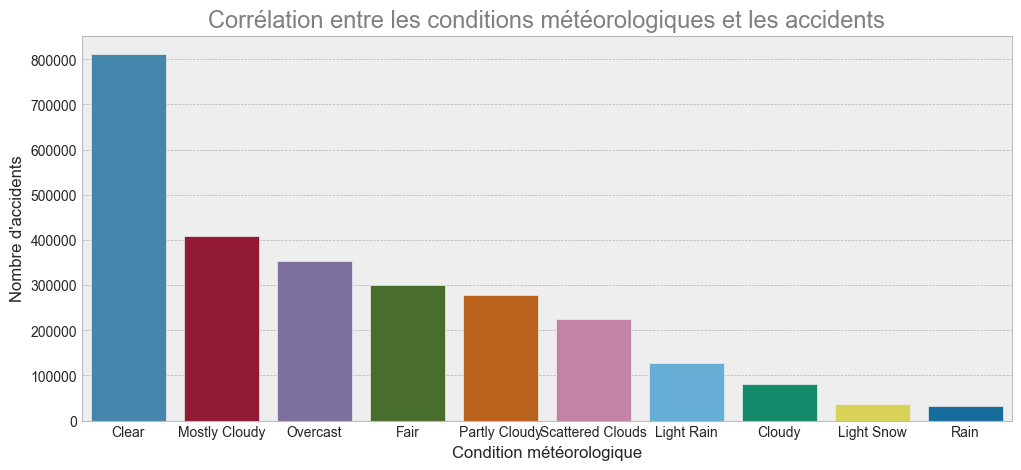

In [39]:
# Compter le nombre d'accidents pour chaque condition météorologique et sélectionner les 10 plus fréquentes
weather_effect = df["Weather_Condition"].value_counts()
weather = weather_effect.head(10)
weather

# Tracer le diagramme en barres
plt.figure(figsize=(12, 5))
sns.barplot(y=weather, x=weather.index)
plt.title("Corrélation entre les conditions météorologiques et les accidents", size=17, color="grey")
plt.xlabel('Condition météorologique')
plt.ylabel('Nombre d\'accidents')

# Afficher le graphique
plt.show()

##### Interpretation du graphique :
On pourrait s'attendre à ce que la majeure partie des accidents surviennent lorsqu'il fait mauvais temps. Mais ce n'est pas ce qu'on observe au vu de ce graphe. On peut donc dire que le temps qu'il fait n'a pas d'influence sur la survenue d'un accident.

Ça peut s'expliquer par le fait que les conducteurs sont plus vigilants lorsqu'il fait mauvais temps

C:\Users\jomic\AppData\Local\Temp\ipykernel_27656\3032723908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_corr = df_meteo.corr().round(2)


<Axes: >

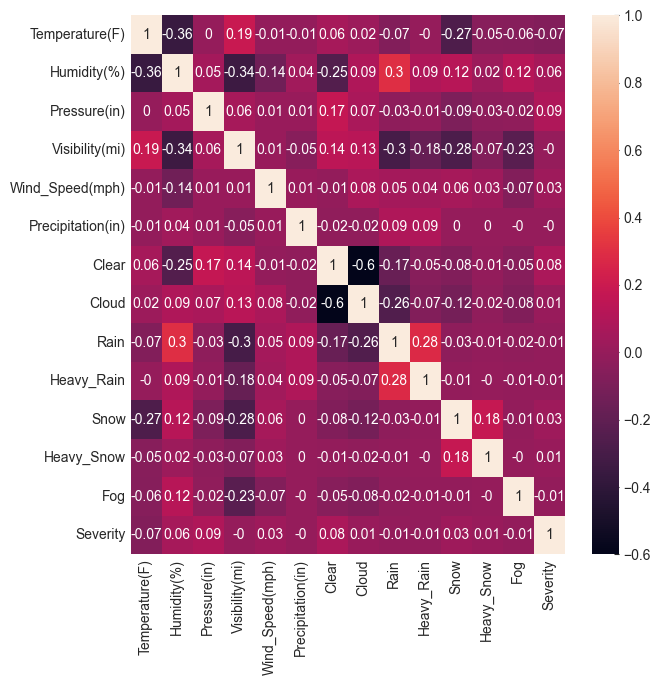

In [40]:
# Calcul de la matrice de corrélation
matrice_corr = df_meteo.corr().round(2)

# Création d'une figure avec une taille personnalisée
fig, ax = plt.subplots(figsize=(7, 7))

# Affichage de la corrélation
sns.heatmap(data = matrice_corr, annot = True, ax=ax)

##### Interpretations:
Les coefficients de corrélation de la matrice indiquent qu'il n'existe aucune corrélation significative entre les variables météorologiques et la gravité des accidents.

### 3. Exploration de la corrélation entre la gravité des accidents et leurs zones géographiques

In [41]:
pip install plotly

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
      --------------------------------------- 0.2/15.3 MB 6.1 MB/s eta 0:00:03
     --- ------------------------------------ 1.3/15.3 MB 16.3 MB/s eta 0:00:01
     -------- ------------------------------- 3.1/15.3 MB 24.7 MB/s eta 0:00:01
     ------------- -------------------------- 5.1/15.3 MB 29.7 MB/s eta 0:00:01
     ---------------- ----------------------- 6.3/15.3 MB 28.6 MB/s eta 0:00:01
     --------------------- ------------------ 8.2/15.3 MB 30.6 MB/s eta 0:00:01
     ------------------------- ------------- 10.1/15.3 MB 32.3 MB/s eta 0:00:01
     ----------------------------- --------- 11.8/15.3 MB 38.5 MB/s eta 0:00:01
     --------------------------------- ----- 13.0/15.3 MB 38.5 MB/s eta 0:00:01
     --------------------------------------  15.1/15.3 MB 36.3 MB/s eta 0:00:01
     --------------------------------------  15.3/15.3 MB 34.4 MB/s eta 0:00:01
     --------------------------------------- 15.3


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


In [42]:
pip install -U kaleido

     ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
     ---------------------------------------- 0.4/65.9 MB 7.6 MB/s eta 0:00:09
      --------------------------------------- 1.3/65.9 MB 14.2 MB/s eta 0:00:05
     - -------------------------------------- 3.0/65.9 MB 21.3 MB/s eta 0:00:03
     -- ------------------------------------- 4.7/65.9 MB 27.1 MB/s eta 0:00:03
     --- ------------------------------------ 5.7/65.9 MB 24.4 MB/s eta 0:00:03
     ---- ----------------------------------- 7.7/65.9 MB 28.8 MB/s eta 0:00:03
     ----- ---------------------------------- 9.6/65.9 MB 30.6 MB/s eta 0:00:02
     ------ -------------------------------- 11.5/65.9 MB 38.5 MB/s eta 0:00:02
     ------- ------------------------------- 13.2/65.9 MB 36.4 MB/s eta 0:00:02
     -------- ------------------------------ 15.0/65.9 MB 38.5 MB/s eta 0:00:02
     ---------- ---------------------------- 17.0/65.9 MB 38.5 MB/s eta 0:00:02
     ----------- --------------------------- 18.8


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


Utilisation de la bibliothèque Plotly pour créer une carte des États-Unis où chaque État est coloré en fonction du nombre d'accidents de voiture qui se sont produits dans cet État. La carte utilise la méthode de visualisation choroplèthe, où la couleur des États est proportionnelle à la valeur de la variable représentée.

In [ ]:
import plotly.graph_objects as go

state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Nombre d'accident pour chaque état", geo_scope="usa")
fig.show(renderer="png")

Utilisation de Plotly pour créer un graphique à barres qui affiche le top 10 des villes avec le plus d'accidents.

In [ ]:
import plotly.graph_objects as go

city_counts = df["City"].value_counts()
top_cities = city_counts.head(10)

fig = go.Figure(data=[go.Bar(x=top_cities.index, y=top_cities.values)])

fig.update_layout(title="Top 10 des villes avec le plus d'accidents",
                  xaxis_title="Ville",
                  yaxis_title="Nombre d'accidents",
                  plot_bgcolor='rgba(0,0,0,0)')

fig.show(renderer="png")

Agrégation des données en groupe par ville en calculant la somme de la gravité des accidents. Sélection des 10 villes ayant la gravité la plus élevée

In [ ]:
df_city = df.groupby('City')['Severity'].sum().reset_index().sort_values('Severity', ascending=False)[:10]

fig = go.Figure(go.Bar(
    x=df_city['Severity'],
    y=df_city['City'],
    orientation='h',
    marker_color='purple',
))

fig.update_layout(
    title_text="Top 10 des villes où la gravité est la plus élevée",
    xaxis_title="Nombre total de gravités",
    yaxis_title="Ville",
    font=dict(size=14),
    yaxis=dict(autorange='reversed'),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show(renderer="png")

## Analyse predictive

Étant donné que la variable de gravité des accidents est d'une grande importance pour notre analyse descriptive, il a été décidé de procéder à une analyse prédictive de cette variable en tenant compte d'un ensemble de facteurs tels que le facteur temporel, météorologique et géographique.

##### Imporation de librairies de Machine Learning

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Préparation des données

Suppression de plusieurs colonnes du dataframe peu utile pour la prédiction

In [ ]:
df = df.drop(["ID", "Side",'Description', 'City', 'County', 'State', "Start_Time", "Description", 'Weather_Condition',"Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"], axis=1)

Affichage de toutes les colonnes restante du dataframe 

In [ ]:
print(df.columns)

In [ ]:
df.head(10)

Extraction des valeurs uniques de la variable "Severity" 

Rappel: plus la valeur de cette variable est élevée, plus l'accident est considéré comme étant de nature grave

In [ ]:
unique_severity_values = df['Severity'].unique()
print(unique_severity_values)

Calcul de la fréquence de chaque valeur dans la colonne 'Severity' du dataframe et affiche les pourcentages correspondants.

In [ ]:
severity_counts = df["Severity"].value_counts()
percentages = severity_counts / len(df) * 100
print(percentages)

Le résultat indique que la majorité des accidents ont une gravité de 2, suivis par ceux ayant une gravité de 3, tandis que les accidents ayant une gravité de 4 sont les moins fréquents. Les pourcentages associés à chaque gravité donnent une idée de la répartition des accidents selon la gravité.

Ce script qui suit équilibre les classes de la variable "Severity" en réduisant chaque classe (2, 3, 4) à la taille minimale trouvée parmi ces classes, en échantillonnant aléatoirement les données. Ensuite, les sous-ensembles équilibrés sont concaténés en une seule table et le pourcentage de chaque classe est calculé pour vérifier que les classes sont maintenant équilibrées.

In [ ]:
severity_counts = df["Severity"].value_counts(normalize=True) * 100

min_size = np.min([len(df[df["Severity"]==s]) for s in [2, 3, 4]])

dfs = []
for s in [2, 3, 4]:
    S = df[df["Severity"]==s].sample(min_size, random_state=42)
    dfs.append(S)

df_balanced = pd.concat(dfs)

severity_counts_balanced = df_balanced["Severity"].value_counts(normalize=True) * 100
print(severity_counts_balanced)

Afficher un graphique en forme de camembert qui représente le nombre d'accidents par niveau de gravité dans le dataframe df_balanced pour s'assurer que le dataframe a bien été équilibré.

In [ ]:
df_balanced['Severity'].value_counts(normalize=False).plot(kind='pie')

In [ ]:
df_balanced.shape

Remplacer les valeurs manquantes dans les colonnes "Wind_Speed(mph)" et "Wind_Direction" par la moyenne de chaque colonne respective, supprime toutes les lignes avec des valeurs manquantes dans n'importe quelle colonne, et affiche le nombre de valeurs manquantes restantes dans chaque colonne du DataFrame "df_balanced".

In [ ]:
features_to_fill = ["Wind_Speed(mph)", "Wind_Direction"]
df_balanced[features_to_fill] = df_balanced[features_to_fill].fillna(df_balanced[features_to_fill].mean())

df_balanced.dropna(inplace=True)

df_balanced.isna().sum()

Afficher les valeurs uniques contenues dans la colonne "Civil_Twilight"

In [ ]:
print(df_balanced["Civil_Twilight"].unique())

Remplacer les valeurs "Night" et "Day" par les valeurs numériques 0 et 1

In [ ]:
df_balanced['Civil_Twilight'] = df_balanced['Civil_Twilight'].replace({'Night': 0, 'Day': 1})
print(df_balanced["Civil_Twilight"].unique())

Afficher les valeurs uniques contenues dans la colonne "Wind_Direction"

In [ ]:
print(df_balanced["Wind_Direction"].unique())

Création d'un dictionnaire et associer chaque valeur unique à une nouvelle valeur numérique

In [ ]:
wind_dir_dict = {'SW': 0, 'CALM': 1, 'W': 2, 'N': 3, 'S': 4, 'NW': 5, 'E': 6, 'SE': 7, 'VAR': 8, 'NE': 9}

df_balanced["Wind_Direction"] = df_balanced["Wind_Direction"].replace(wind_dir_dict)

df_balanced = df_balanced.dropna(subset=["Wind_Direction"])
df_balanced["Wind_Direction"] = df_balanced["Wind_Direction"].astype(int)

print(df_balanced["Wind_Direction"].unique())

Remplacer les valeurs booléennes True et False dans le dataframe df_balanced respectivement par les entiers 1 et 0

In [ ]:
df_balanced = df_balanced.replace([True, False], [1, 0])
df = df_balanced

In [ ]:
df.head(10)

### Elaboration du modele de Machine Learning - Random Forest Classifier
RandomForestClassifier est un modèle d'apprentissage automatique qui combine plusieurs arbres de décision pour créer un modèle plus robuste et généralisable.

Nous montrerons les performances du modele à l'aide de différentes mesures : précision, rappel, exactitude.

In [ ]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

Echantillonnage aléatoire de 20% des données de df à l'aide de la méthode "sample" de pandas, en utilisant un random seed de 42 pour garantir la reproductibilité des résultats.

In [ ]:
df = df.sample(frac=0.20, random_state=42)

Nous commencons par effectuer une division aléatoire des données en deux sous-ensembles : df et df_test.
df_test sera utilisé pour évaluer les performances du modèle, tandis que le sous-ensemble df sera utilisé pour entraîner le modèle. 30% des données seront utilisées pour les tests. Le paramètre "random_state" permet de fixer une graine aléatoire pour la reproductibilité des résultats

In [ ]:
df, df_test = train_test_split(df, test_size=.2, random_state=42)
print(df.shape, df_test.shape)

Un échantillon de données doit être créé à partir de df. Celui-ci est divisé en deux parties, un ensemble d'entraînement X_train, y_train et un ensemble de validation X_validate et y_validate.

Le code commence par copier df dans un nouveau dataframe sample. Ensuite, il sépare la variable cible Severity des autres variables explicatives et les stocke respectivement dans les variables y_sample et X_sample.

Enfin, il utilise la fonction train_test_split de scikit-learn pour diviser X_sample et y_sample en un ensemble d'entraînement et un ensemble de validation, avec une proportion de 70% pour l'ensemble d'entraînement et 30% pour l'ensemble de validation.

In [ ]:
sample = df
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, test_size=.25, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

D'abord nous créons une instance de la classe RandomForestClassifier de la bibliothèque scikit-learn, en spécifiant n_jobs=-1 pour utiliser tous les cœurs disponibles du processeur

Une liste de dictionnaires est définie dans la variable "parameters". Ici, nous avons deux paramètres, le nombre d'estimateurs (n_estimators) et la profondeur maximale (max_depth) de l'arbre. 

La recherche en grille testera quatre valeurs différentes pour déterminer la meilleure valeur pour le nombre d'estimateurs dans le modèle de forêt aléatoire et quatre valeurs différentes pour déterminer la meilleure valeur pour la profondeur maximale des arbres et la meilleure configuration dans le modèle de forêt aléatoire

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]

Création d'une instance de la classe GridSearchCV de la bibliothèque scikit-learn pour effectuer une recherche en grille sur les hyperparamètres du modèle de forêt aléatoire

Nous effectuons une recherche en grille (GridSearch) en utilisant la méthode d'apprentissage RandomForestClassifier sur l'ensemble d'entraînement X_train et y_train pour trouver la meilleure combinaison de paramètres.

La fonction GridSearchCV  entraîne et évalue le modèle pour chaque combinaison de paramètres spécifiée, en utilisant la stratégie de validation croisée. Elle renvoie ensuite la meilleure combinaison de paramètres qui donne le meilleur score de validation croisée.

Un modèle est entrainé pour chaque combinaison de paramètres dans la grille et évalue les performances de chaque modèle sur les données d'entraînement à l'aide d'une validation croisée. À la fin de l'ajustement, il retourne le modèle avec les meilleurs paramètres trouvés.

In [ ]:
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

Afficher les meilleurs paramètres trouvés lors de la recherche en grille effectuée précédemment avec GridSearchCV

In [ ]:
print("Best parameters scores:")
print(grid.best_params_)

Afficher le meilleur score de performance du modèle de forêt aléatoire sur l'ensemble des données d'entraînement et de test

In [ ]:
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Transformer les résultats de la recherche en grille GridSearchCV en un DataFrame pandas et trier les résultats par ordre de performance en fonction du score de test

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score").head(10)

In [ ]:
# y_pred = rfc.predict(X_validate)

# accuracy["Random Forest"] = accuracy_score(y_validate, y_pred)
# f1["Random Forest"] = f1_score(y_validate, y_pred, average="macro")

# print(classification_report(y_train, rfc.predict(X_train)))
# print(classification_report(y_validate, y_pred))